In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [4]:
rng = np.random.default_rng(19680801)

In [5]:
rng

Generator(PCG64) at 0x7F8A8BF1DBA0

(array([2.0000e+00, 2.1000e+01, 5.1000e+01, 2.3500e+02, 7.8100e+02,
        2.1000e+03, 4.5730e+03, 8.3390e+03, 1.2758e+04, 1.6363e+04,
        1.7345e+04, 1.4923e+04, 1.0920e+04, 6.4830e+03, 3.1070e+03,
        1.3810e+03, 4.5300e+02, 1.2200e+02, 3.6000e+01, 7.0000e+00]),
 array([3.20889223, 3.38336526, 3.55783829, 3.73231132, 3.90678435,
        4.08125738, 4.25573041, 4.43020344, 4.60467647, 4.7791495 ,
        4.95362253, 5.12809556, 5.30256859, 5.47704162, 5.65151465,
        5.82598768, 6.00046071, 6.17493374, 6.34940677, 6.5238798 ,
        6.69835283]),
 <BarContainer object of 20 artists>)

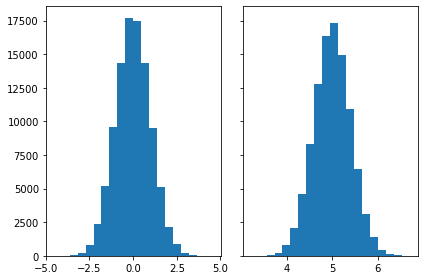

In [6]:
N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

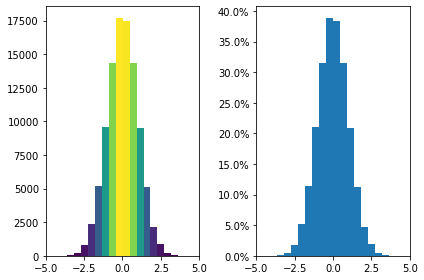

In [7]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(dist1, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(dist1, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))